In [1]:
'''
lenet5+keras+minst数据集
'''
# import tensorflow as tf
# print(tf.test.is_gpu_available())
# 导包
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
import time
import matplotlib.pyplot as plt
# 记录程序运行时间
start_time = time.clock()

# 定义Lenet5模型函数


def lenet5():

    # 首先建立空模型
    model = Sequential()
    # 第一层卷积层（6*5*5），激活函数用relu函数，不使用padding，input_shape为（28*28*1）,步长为默认即可
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
              padding='valid', input_shape=(28, 28, 1)))
    #%%%24*24*6 （5*5+1）*6 = 156
    
    # 第二层为最大池化层（2*2）
    model.add(MaxPool2D(pool_size=(2, 2)))
    #%%%12*12*6 0
    
    # 第三层为卷积2层（16*5*5），激活函数用relu函数
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    #%%%8*8*16 （5*5*6+1）*16 = 2416
    
    # 第四层为最大池化2层（2*2）
    model.add(MaxPool2D(pool_size=(2, 2)))
    #%%%4*4*16 0
    
    # 第五、六层为全连接层，第一层120个神经元；第二层为84个神经元
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))#（4*4*16+1）*120 = 30840 全联接
    model.add(Dense(84, activation='relu')) #（120+1）*84 = 10164 全联接
    # 输出层（手写数字体识别，因此为10个，激活函数为softmax）
    model.add(Dense(10, activation='softmax'))# （84+1）*10 = 850 全联接

    return model

# 定义加载minst数据的函数


def loadingdata():
    '''
            x_train为训练集图像
            y_train为训练集的标签（真实值）
            y_train为测试集的标签（真实值）
            x_test为测试集的图像
    '''
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # 对数据进行预处理，方便输入进去
    x_train = x_train.reshape(len(x_train), 28, 28, 1) / 255
    x_test = x_test.reshape(len(x_test), 28, 28, 1) / 255
    # one-hot编码（因为标签是1,2,3这样的，计算机只喜欢0,1这样的编码形式，这就需要one-hot编码）
    # 通俗上理解就是把（0-9）变为（0,1）这样的形式
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return [x_train, y_train, x_test, y_test]


# 定义训练参数
batch_size_num = 100
epochs_num = 20

# 加载数据
data = loadingdata()
train_img = data[0]
train_label = data[1]
test_img = data[2]
test_label = data[3]

# start training
lenetmodel = lenet5()#得到模型实例

lenetmodel.summary()#输出模型信息
lenetmodel.compile(loss=categorical_crossentropy,
                   optimizer='Rmsprop', metrics=['accuracy'])
lenetmodel.fit(train_img, train_label, batch_size=batch_size_num, epochs=epochs_num, verbose=1,
               validation_data=(test_img, test_label))
score = lenetmodel.evaluate(test_img, test_label)
print('final_loss= %f final_accuracy= %f' % (score[0], score[1]))
end_time = time.clock()
print('time is %0.3f s' % (end_time-start_time))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

final_loss= 0.059166 final_accuracy= 0.989000
time is 174.820 s


In [2]:
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)



(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


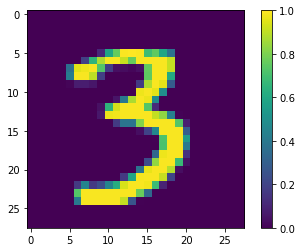

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 28, 28, 1)
[[1.1655942e-33 5.7921540e-22 7.2551149e-26 1.0000000e+00 2.0363692e-26
  1.1745229e-15 2.3501861e-33 7.3550972e-19 1.4901006e-19 1.0523560e-18]]
(1, 10)


array([3])

In [3]:
index = 10000
plt.figure()
plt.imshow(train_img[index])
print(train_label[index])
plt.colorbar()
plt.grid(False)
plt.show()


predictimg = train_img[index:index+1]
print(type(train_img))
print(type(predictimg))
print(predictimg.shape)
predict_test = lenetmodel.predict(predictimg)
print(predict_test)
print(predict_test.shape)
import numpy
numpy.argmax(predict_test,axis=1)  #axis = 1是取行的最大值的索引，0是列的最大值的索引

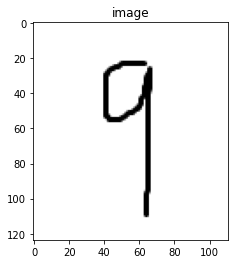

NameError: name 'np' is not defined

In [4]:
from PIL import Image
import os
img = Image.open(os.path.join('/home/lipenghui03/data/handwriting/','9' + '.png'))
plt.figure("Image") # 图像窗口名称
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像题目
plt.show()
img = img.convert('L')
img = img.resize((28,28))
img_array = np.array(img)
img_array = 255 - img_array
img_array = img_array.reshape((1,28,28,1))/255
plt.figure("Image1") # 图像窗口名称
plt.imshow(img_array[0])
plt.axis('on') # 关掉坐标轴为 off
plt.title('image1') # 图像题目
plt.show()
print(img_array.shape)
print(img_array[0].shape)
predict_test = lenetmodel.predict(img_array)
print(predict_test)
print(predict_test.shape)
import numpy
numpy.argmax(predict_test,axis=1)  #axis = 1是取行的最大值的索引，0是列的最大值的索引

In [22]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: lenetmodel(x))
full_model = full_model.get_concrete_function(
tf.TensorSpec(lenetmodel.inputs[0].shape, lenetmodel.inputs[0].dtype))

# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 50)
print("Frozen model layers: ")
for layer in layers:
    print(layer)

print("-" * 50)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

# Save frozen graph from frozen ConcreteFunction to hard drive
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,logdir='/home/data/handwriting',name="frozen_graph.pb",as_text=False)


--------------------------------------------------
Frozen model layers: 
x
sequential/conv2d/Conv2D/ReadVariableOp/resource
sequential/conv2d/Conv2D/ReadVariableOp
sequential/conv2d/Conv2D
sequential/conv2d/BiasAdd/ReadVariableOp/resource
sequential/conv2d/BiasAdd/ReadVariableOp
sequential/conv2d/BiasAdd
sequential/conv2d/Relu
sequential/max_pooling2d/MaxPool
sequential/conv2d_1/Conv2D/ReadVariableOp/resource
sequential/conv2d_1/Conv2D/ReadVariableOp
sequential/conv2d_1/Conv2D
sequential/conv2d_1/BiasAdd/ReadVariableOp/resource
sequential/conv2d_1/BiasAdd/ReadVariableOp
sequential/conv2d_1/BiasAdd
sequential/conv2d_1/Relu
sequential/max_pooling2d_1/MaxPool
sequential/flatten/Reshape/shape
sequential/flatten/Reshape
sequential/dense/MatMul/ReadVariableOp/resource
sequential/dense/MatMul/ReadVariableOp
sequential/dense/MatMul
sequential/dense/BiasAdd/ReadVariableOp/resource
sequential/dense/BiasAdd/ReadVariableOp
sequential/dense/BiasAdd
sequential/dense/Relu
sequential/dense_1/MatMul/Re

'/home/lipenghui03/data/handwriting/frozen_graph.pb'

In [10]:
import tensorflow as tf
tf.keras.models.save_model(lenetmodel,'/home/lipenghui03/data/handwriting') 

INFO:tensorflow:Assets written to: /home/lipenghui03/data/handwriting/assets


In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
    # 对数据进行预处理，方便输入进去
#     x_train = x_train.reshape(len(x_train), 28, 28, 1) / 255
#     x_test = x_test.reshape(len(x_test), 28, 28, 1) / 255
# print(x_train.shape)
# plt.figure("Image1") # 图像窗口名称
# plt.imshow(x_train[0])
# plt.axis('on') # 关掉坐标轴为 off
# plt.title('image1') # 图像题目
# plt.show()

In [25]:
print(y_test[0])
print(test_label[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(x_train.shape)
print(len(x_train))
x_train_reshape = x_train.reshape(len(x_train), 28, 28, 1) / 255
print(x_train_reshape.shape)
print(len(x_train_reshape))

In [ ]:
predict_test
print(predict_test.shape)
print(predict_test)

In [ ]:
a = numpy.array([1,2,3])
print(a.shape)
print(a)

In [ ]:
import tensorflow as tf
print(tf.test.is_gpu_available())